In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [19, 8] 

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Introduction

Support Vector Machines are a number of machine learning techniques, based on the algorithm called *Support Vector*.

Support Vector Machine can be used in regression with the SVR (Support Vector Regression) and in classification with the SVC (Support Vector Classification).

For SVM, the data points are distributed in a multidimensional space called *decision space*, where the values of a specific feature are distributed on each axis.

The purpose of Support Vector Machine is to build a separation surface called the *decision boundary* that divides the *decision space* into two areas of belonging.

In the linear case, the decision boundary is represented by a straight line (2D) or a plane (3D) or a hyperplane (nD).

The purpose of SVM is to find a hyperplane separating the space between the two classes.

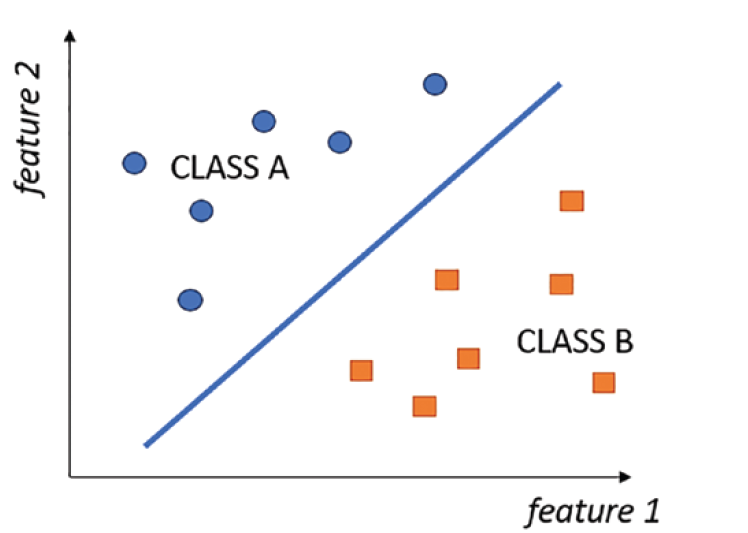

SVM finds the points that are closest to the dividing line. These are called *support vectors* and they give the algorithm its name.

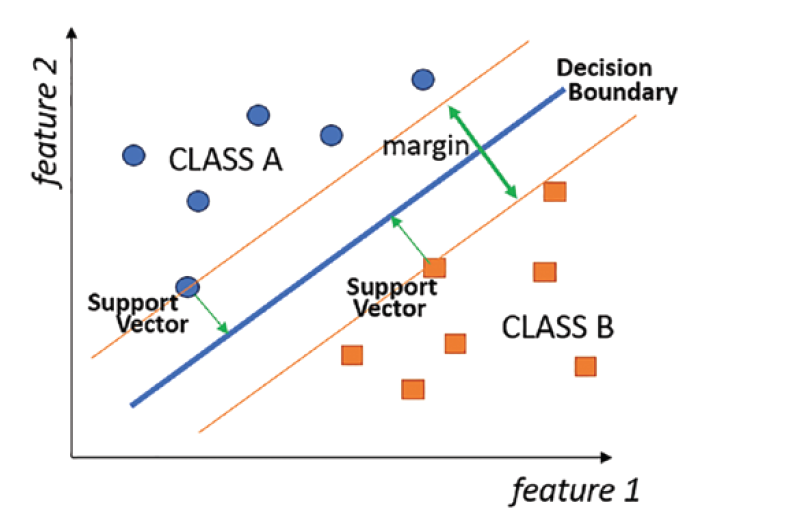

The distance between the support vectors and the decision boundary (the straight line) is called the margin.

* How to decide the best boundary for the classification?

* Consider the line near to the data points or far from the data points?

The line with the higher margin is better as it can classify the 2 groups in a better way.

Support Vector Machine's task is to maximize the margin. When the margin reaches its maximum value, then the decision boundary will be the optimal one.

# Case Study - Iris Flower Species Identification

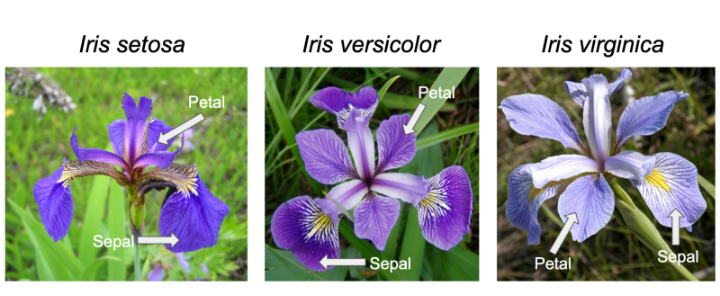

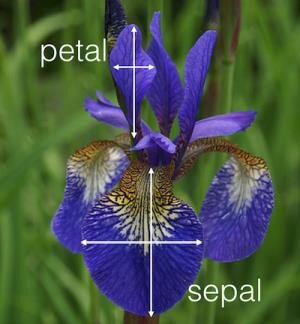

## Data

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_df['target'] = iris.target

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris_df.duplicated().sum()

1

In [13]:
iris_df.drop_duplicates(inplace=True)

In [14]:
iris_df.duplicated().sum()

0

## Data Visualization

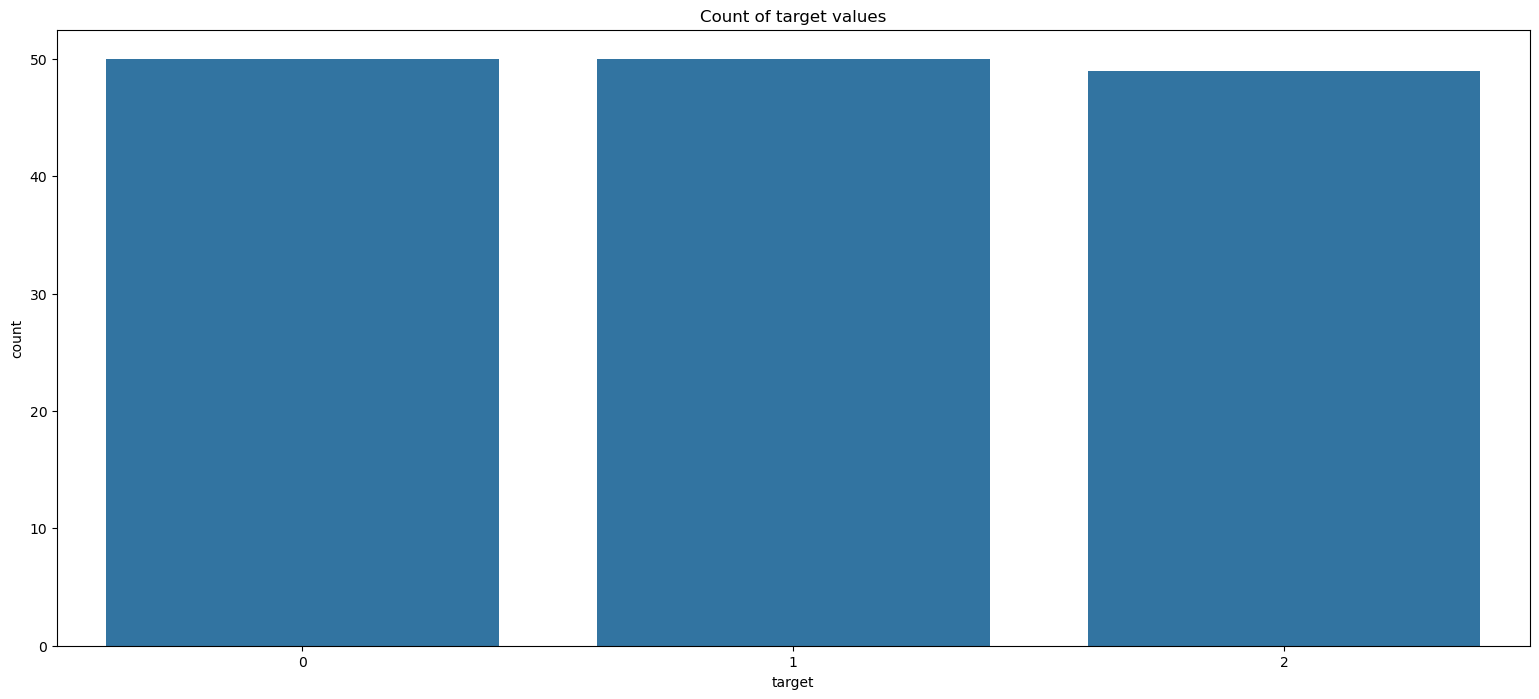

In [15]:
sns.countplot(data=iris_df, x='target')
plt.title("Count of target values")
plt.show()

In [16]:
iris_setosa = iris_df.loc[iris_df['target'] == 0, :]

iris_versicolor = iris_df.loc[iris_df['target'] == 1, :]

iris_virginica = iris_df.loc[iris_df['target'] == 2, :]

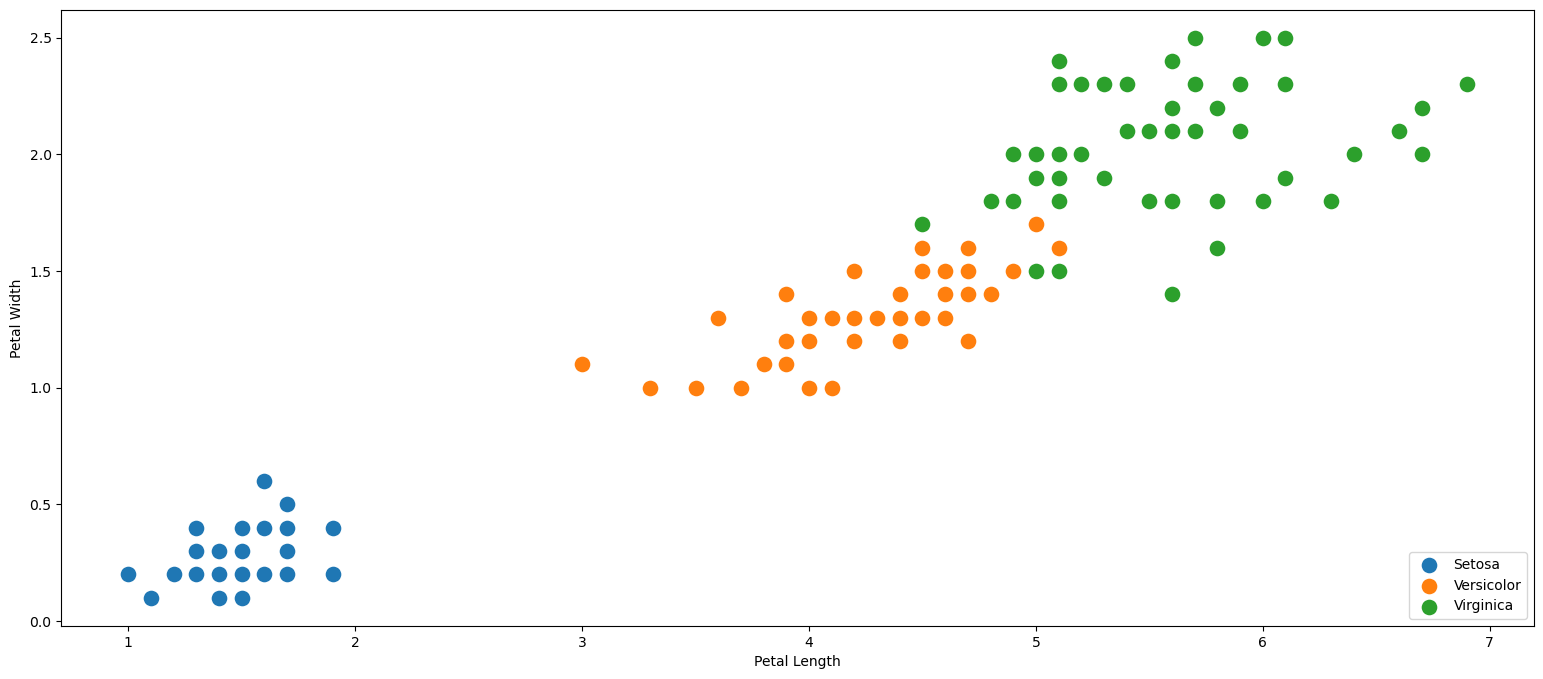

In [17]:
sns.scatterplot(data=iris_setosa, x='petal length (cm)', y='petal width (cm)', s=150)

sns.scatterplot(data=iris_versicolor, x='petal length (cm)', y='petal width (cm)', s=150)

sns.scatterplot(data=iris_virginica, x='petal length (cm)', y='petal width (cm)', s=150)

plt.legend(['Setosa', 'Versicolor', 'Virginica'], loc='lower right')

plt.xlabel('Petal Length')

plt.ylabel('Petal Width')

plt.show()

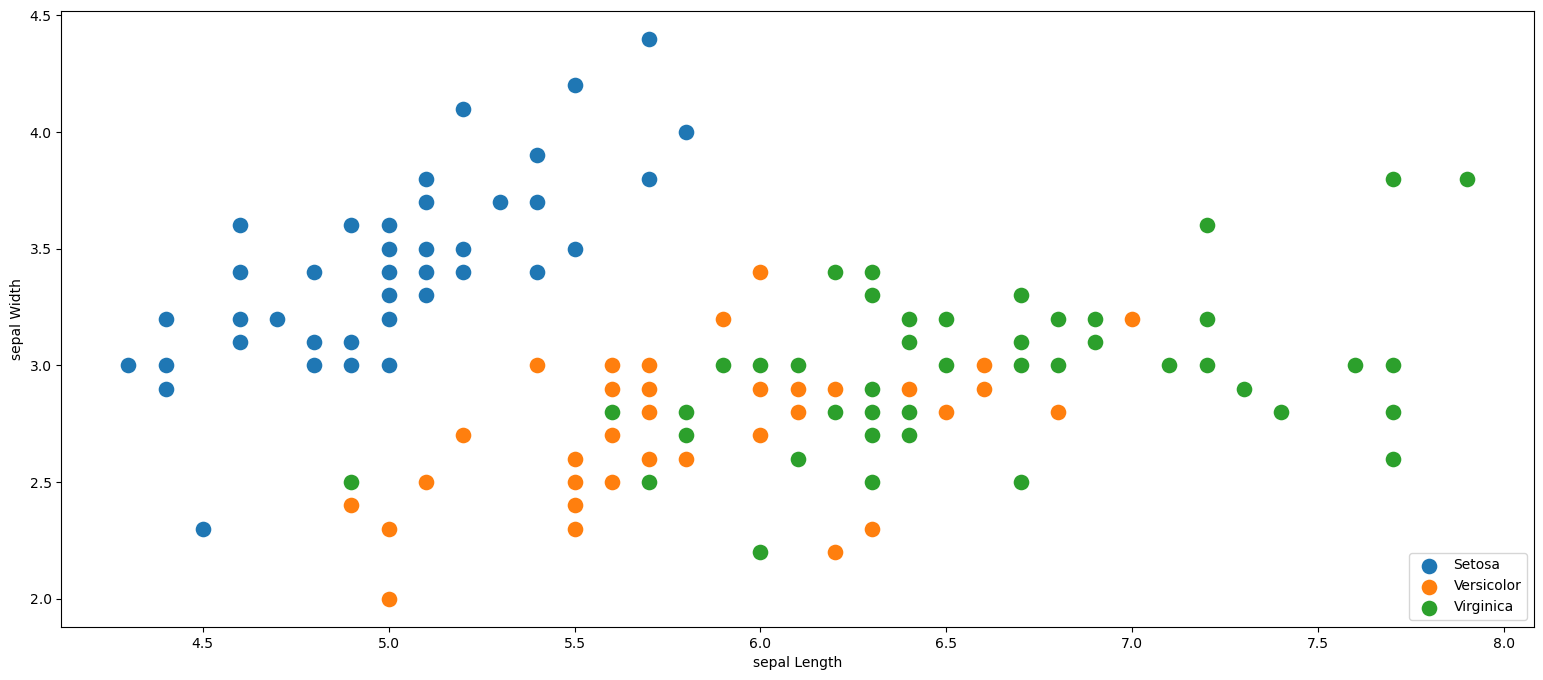

In [18]:
sns.scatterplot(data=iris_setosa, x='sepal length (cm)', y='sepal width (cm)', s=150)

sns.scatterplot(data=iris_versicolor, x='sepal length (cm)', y='sepal width (cm)', s=150)

sns.scatterplot(data=iris_virginica, x='sepal length (cm)', y='sepal width (cm)', s=150)

plt.legend(['Setosa', 'Versicolor', 'Virginica'], loc='lower right')

plt.xlabel('sepal Length')

plt.ylabel('sepal Width')

plt.show()

## Outlier

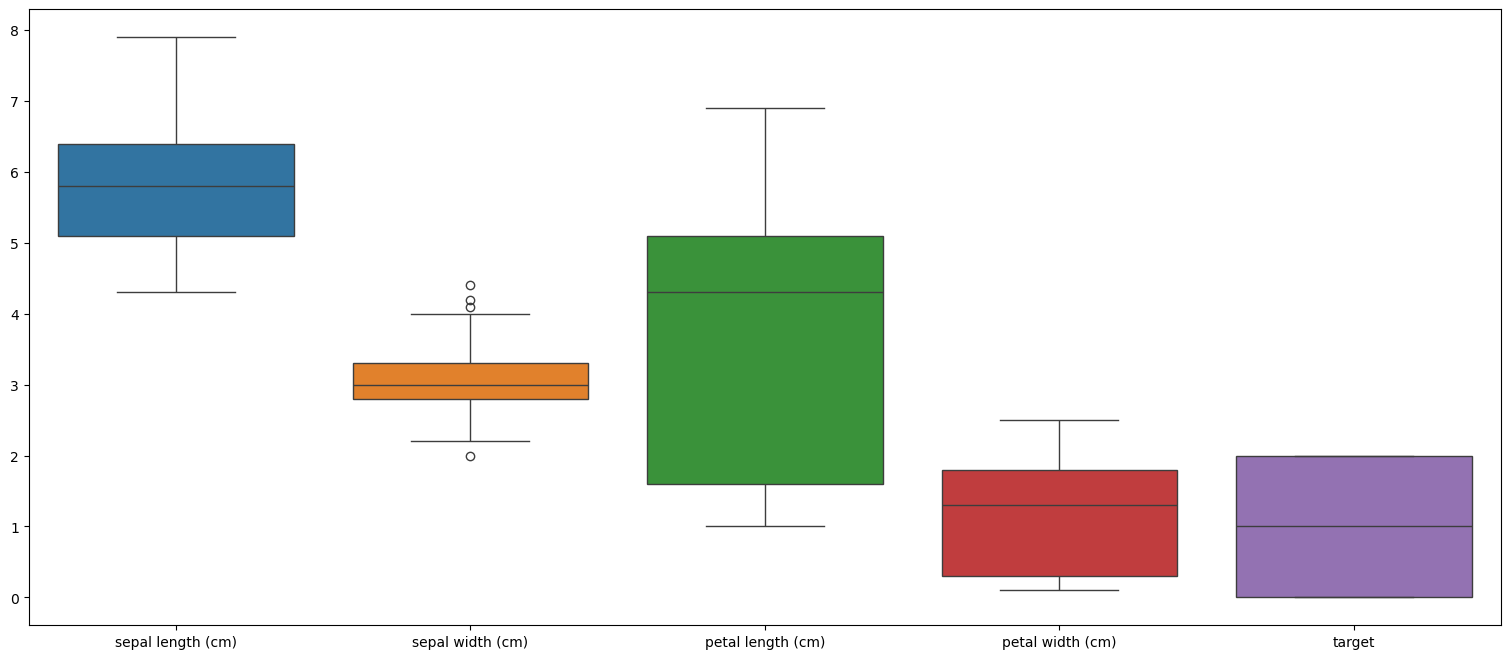

In [19]:
sns.boxplot(iris_df)

plt.show()

In [20]:
# obtain the first quartile
Q1 = iris_df.quantile(0.25)

# obtain the third quartile
Q3 = iris_df.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
target               2.0
dtype: float64


In [21]:
ul = Q3 + 1.5 * IQR

ll = Q1 - 1.5 * IQR

In [22]:
iris_df = iris_df[~((iris_df < ll) |(iris_df > ul)).any(axis=1)]

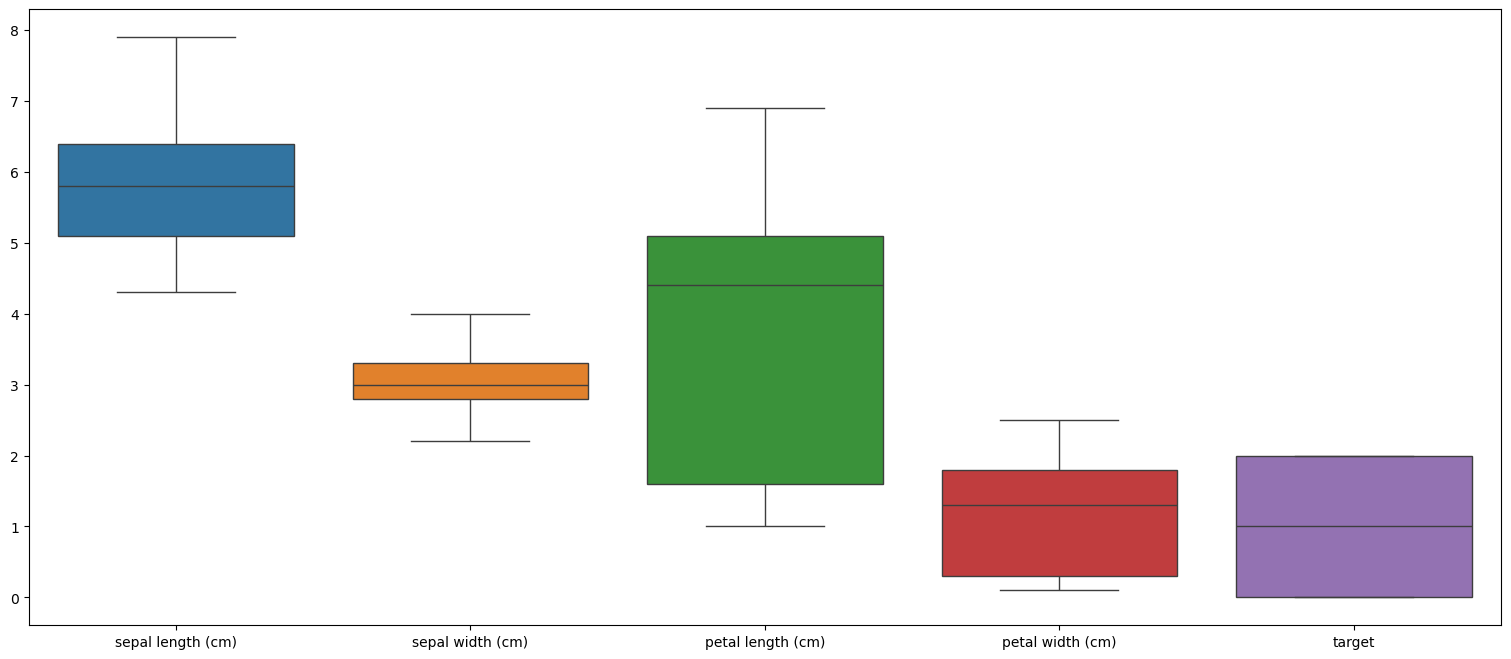

In [23]:
sns.boxplot(iris_df)

plt.show()

## Divide the data frame into independent and dependent variables

In [24]:
X = iris_df.loc[:, :'petal width (cm)'].values

y = iris_df.loc[:, 'target'].values

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Data Normalization

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X = scaler.fit_transform(X)

## Split the Data into train and test data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Model Training

In [31]:
from sklearn.svm import SVC # Support Vector Classifier

### Parameters in Support Vector Machine

#### Gamma parameter

Gamma value decides whether the data points close to the hyperplane should be considered to classify a data point or not.

When *gamma* is low, points far from the hyperplane are also included in decision making.

When *gamma* is high, points close to the hyperplane are included.

In the sklearn library, *gamma* can be *auto* or *scale*. 

The default value of *gamma* is *scale*.

*gamma* is calculated using the following formula:

When *gamma* is *auto*, *gamma* = 1/no. of independent variables.

Whne *gamma* is *scale* *gamma* = 1/(no. of independent variables * X.var())

#### Regularization

Regularization helps to solve over fitting problem in machine learning.

Over fitting refers to low bias and high variance.

To reduce the varaince, a penalty term is added to the formula used by the model.

In sklearn, regularization is indiacted by C.

When C value is low, SVM uses a larger margin between the data points. The data points closer to the hyper plane may not be classified correctly.

When C value is high, the margin will be small and maximum data points can be classified correctly.

The default value of C is 1.0

#### Kernel function

Sometimes, it may not be possible to divide the data points using a straight line. In such case, we may need to use curved line.

A kernel function is a mathematical formula used to rearrange the data points such that they can be divided clearly by the SVM.

Following are the different types of kernel functions that can be used by the SVM:

* Linear kernel function
* Polynomial kernel function
* Radial Basis function
* Sigmoid kernel function

In [32]:
model = SVC(kernel='linear')

In [33]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
model.score(X_train, y_train)

0.9827586206896551

## Model Evaluation

In [35]:
model.score(X_test, y_test)

0.9310344827586207

## Model Prediction

In [36]:
y_predict = model.predict(X_test)

In [37]:
y_predict

array([0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 1,
       0, 0, 2, 2, 2, 2, 1])

In [38]:
y_test

array([0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1,
       0, 0, 2, 2, 2, 2, 1])

## Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(y_test, y_predict)

In [41]:
cm

array([[11,  0,  0],
       [ 0,  8,  2],
       [ 0,  0,  8]], dtype=int64)

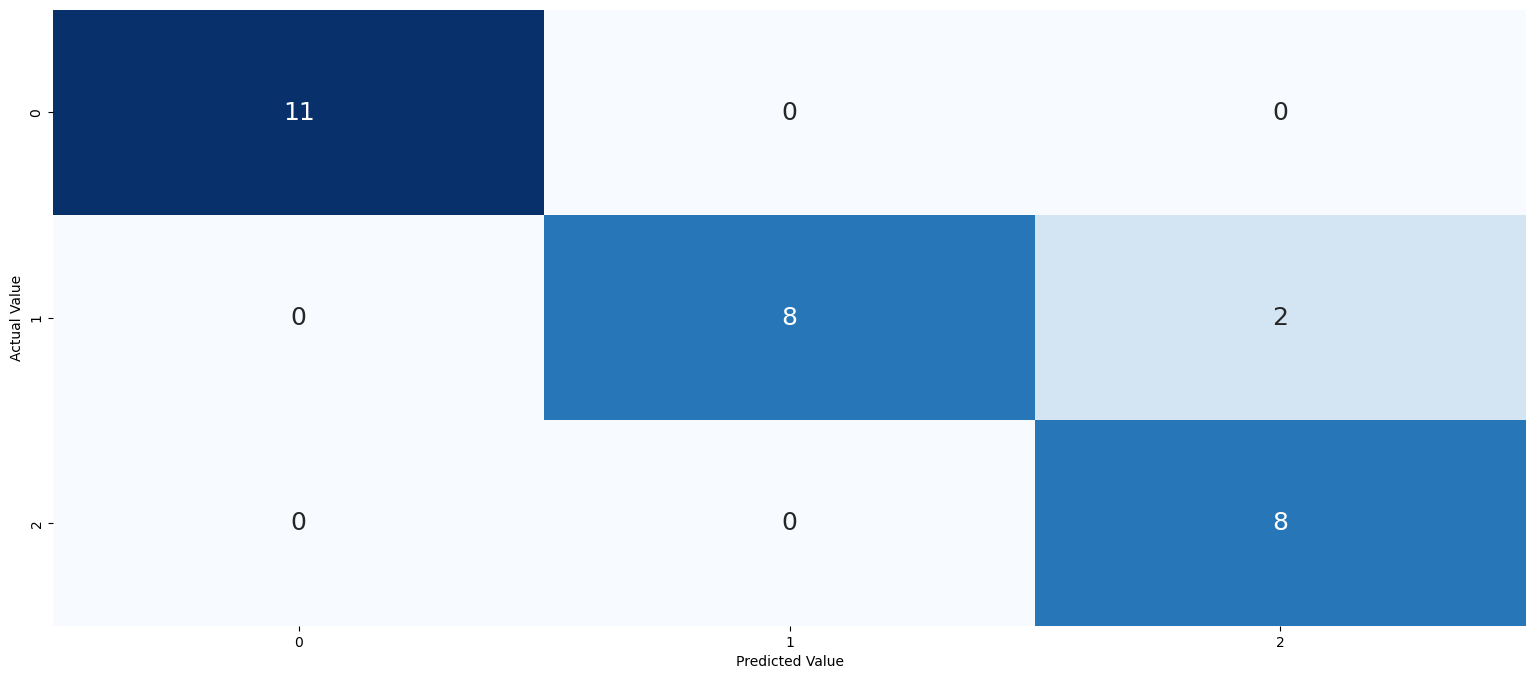

In [42]:
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={"fontsize":18})

plt.xlabel("Predicted Value")

plt.ylabel("Actual Value")

plt.show()

## Classification Report

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89        10
           2       0.80      1.00      0.89         8

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29

